# CNN( Convolutional Neural Network, 합성곱 신경망 )

In [1]:
# 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 환경 설정
pd.set_option( 'display.max_columns', 20 )
pd.set_option( 'display.max_colwidth', 20 )
pd.set_option( 'display.unicode.east_asian_width', True )

from matplotlib import font_manager, rc

# Windows 사용시 matplotlib 한글 폰트 사용 설정
# font_path = "c:\\Windows\\Fonts\\malgun.ttf"
# font_name = font_manager.FontProperties( fname = font_path ).get_name()
# rc( 'font', family = font_name )

# Mac OS 사용시 matplotlib 한글 폰트 사용 설정
rc( 'font', family = 'AppleGothic' )

import warnings
warnings.filterwarnings( 'ignore' )

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

* 패션 MNIST 데이터셋 로드

In [3]:
( X_train, y_train ), ( X_test, y_test_org ) =\
    keras.datasets.fashion_mnist.load_data()

In [4]:
print( f'X_train shape : {X_train.shape}' )
print( f'y_train shape : {y_train.shape}' )

X_train shape : (60000, 28, 28)
y_train shape : (60000,)


In [5]:
print( f'X_test shape : {X_test.shape}' )
print( f'y_test shape : {y_test_org.shape}' )

X_test shape : (10000, 28, 28)
y_test shape : (10000,)


* 패션 MNIST 이미지 

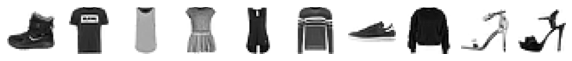

In [6]:
fig, axs = plt.subplots( 1, 10, figsize = ( 10, 10 ) )
for i in range( 10 ):
    axs[ i ].imshow( X_train[ i ], cmap = 'gray_r' )
    axs[ i ].axis( 'off' )
plt.show()

* 이미지에 채널 정보 추가

In [7]:
X_train_reshape = X_train.reshape( -1, 28, 28, 1 ) / 255.0

In [8]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_train_reshape, y_train, test_size = 0.2, random_state = 42
)

In [9]:
print( f'X_train_scaled shape : {X_train_scaled.shape}' )
print( f'X_test_scaled shape : {X_test_scaled.shape}' )

X_train_scaled shape : (48000, 28, 28, 1)
X_test_scaled shape : (12000, 28, 28, 1)


* 합성곱 신경망 모델 구성

In [10]:
model = keras.Sequential()
# 32개 필터 사용
# kernel size : 3 X 3
# padding : 특성 맵의 크기를 입력 이미지와 같은 크기
model.add( keras.layers.Conv2D( 32, kernel_size = 3, activation = 'relu',
                                padding = 'same', input_shape = ( 28, 28, 1 ) ) )
# kernel size : 2 x 2
model.add( keras.layers.MaxPooling2D( 2 ) )
model.add( keras.layers.Conv2D( 64, kernel_size = 3, activation = 'relu',
                                padding = 'same' ) )
model.add( keras.layers.MaxPooling2D( 2 ) )
model.add( keras.layers.Flatten() ) # 1차원 형태로 변환

# Fully-Connected
model.add( keras.layers.Dense( 100, activation = 'relu' ) )
model.add( keras.layers.Dropout( 0.4 ) )
model.add( keras.layers.Dense( 10, activation = 'softmax' ) )

2021-11-26 13:51:33.659655: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-26 13:51:33.665887: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

* 합성곱 신경망 모델 생성

In [12]:
model.compile( optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
               metrics = [ 'accuracy' ] )

* 합성곱 신경망 학습

In [13]:
checkpoint_cb = keras.callbacks.ModelCheckpoint( 'best-cnn-model.h5' )
early_stopping_cb = keras.callbacks.EarlyStopping( patience = 2,
                                                   restore_best_weights = True )

history = model.fit( X_train_scaled, y_train, epochs = 20,
                     validation_data = ( X_test_scaled, y_test ),
                     callbacks = [ checkpoint_cb, early_stopping_cb ] )

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 280s 6ms/sample - loss: 0.5211 - accuracy: 0.8149 - val_loss: 0.3244 - val_accuracy: 0.8777
Epoch 2/20
48000/48000 [==============================] - 163s 3ms/sample - loss: 0.3530 - accuracy: 0.8740 - val_loss: 0.2806 - val_accuracy: 0.8935
Epoch 3/20
48000/48000 [==============================] - 167s 3ms/sample - loss: 0.3041 - accuracy: 0.8890 - val_loss: 0.2539 - val_accuracy: 0.9051
Epoch 4/20
48000/48000 [==============================] - 185s 4ms/sample - loss: 0.2743 - accuracy: 0.8994 - val_loss: 0.2621 - val_accuracy: 0.9003
Epoch 5/20
48000/48000 [==============================] - 182s 4ms/sample - loss: 0.2468 - accuracy: 0.9100 - val_loss: 0.2370 - val_accuracy: 0.9083
Epoch 6/20
48000/48000 [==============================] - 190s 4ms/sample - loss: 0.2287 - accuracy: 0.9154 - val_loss: 0.2289 - val_accuracy: 0.9181
Epoch 7/20
48000/48000 [==========================

* 학습 과정 시각화

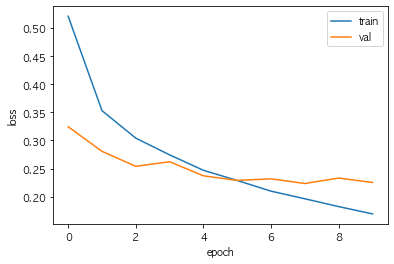

In [14]:
plt.plot( history.history[ 'loss' ] )
plt.plot( history.history[ 'val_loss' ] )
plt.xlabel( 'epoch' )
plt.ylabel( 'loss' )
plt.legend( [ 'train', 'val' ] )
plt.show()

* 합성곱 신경망 생성 모델 평가

In [15]:
model.evaluate( X_test_scaled, y_test, verbose = 2 )

12000/1 - 17s - loss: 0.1830 - accuracy: 0.9181


[0.2233325445254644, 0.9180833]

* 첫 번째 샘플 이미지에 대한 예측 결과 확인

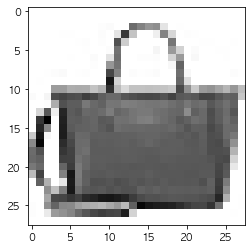

In [16]:
plt.imshow( X_test_scaled[ 0 ].reshape( 28, 28 ), cmap = 'gray_r' )
plt.show()

In [17]:
predict = model.predict( X_test_scaled[ 0:1 ] )
predict

array([[1.6176380e-15, 2.5803014e-25, 1.5926113e-19, 1.7113032e-19,
        2.6635033e-16, 1.6970436e-17, 1.8975388e-16, 9.8267702e-19,
        1.0000000e+00, 1.5695064e-21]], dtype=float32)

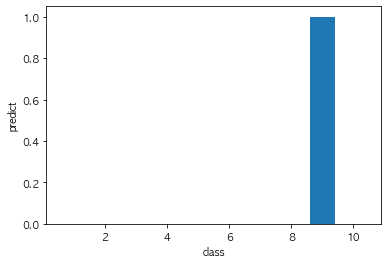

In [18]:
plt.bar( range( 1, 11 ), predict[ 0 ] )
plt.xlabel( 'class' )
plt.ylabel( 'predict' )
plt.show()

In [19]:
classes = [ '티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', 
            '셔츠', '스니커즈', '가방', '앵글부츠' ]
print( classes[ np.argmax( predict ) ] )

가방


* 테스트 데이터에 대한 평가

In [20]:
X_test_reshape = X_test.reshape( -1, 28, 28, 1 ) / 255.0

In [21]:
model.evaluate( X_test_reshape, y_test_org, verbose = 2 )

10000/1 - 15s - loss: 0.1665 - accuracy: 0.9114


[0.24116492268443107, 0.9114]

### 가중치 시각화

In [22]:
model = keras.models.load_model( 'best-cnn-model.h5' )

In [23]:
model.layers

In [24]:
conv = model.layers[ 0 ]
print( conv.weights[ 0 ].shape, conv.weights[ 1 ].shape )

(3, 3, 1, 32) (32,)


In [25]:
conv_weights = conv.weights[ 0 ].numpy()
print( conv_weights.mean(), conv_weights.std() )

-0.030769523 0.27670243


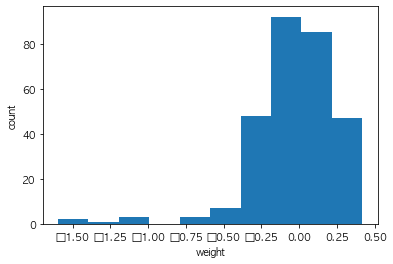

In [26]:
plt.hist( conv_weights.reshape( -1, 1 ) )
plt.xlabel( 'weight' )
plt.ylabel( 'count' )
plt.show()

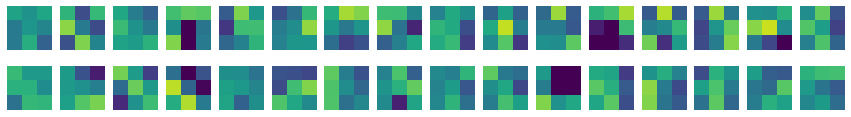

In [27]:
fig, axs = plt.subplots( 2, 16, figsize = ( 15, 2 ) )
for i in range( 2 ):
    for j in range( 16 ):
        axs[ i, j ].imshow( conv_weights[ :, :, 0, i * 16 + j ],
                            vmin = -0.5, vmax = 0.5 )
        axs[ i, j ].axis( 'off' )
plt.show()

* 학습된 가중치와 학습하지 않은 가중치 차이 비교

In [28]:
no_training_model = keras.Sequential()
no_training_model.add( keras.layers.Conv2D( 32, kernel_size = 3,
                                            activation = 'relu',
                                            padding = 'same',
                                            input_shape = ( 28, 28, 1 ) ) )

In [29]:
no_training_conv = no_training_model.layers[ 0 ]
print( no_training_conv.weights[ 0 ].shape )

(3, 3, 1, 32)


In [30]:
no_training_weights = no_training_conv.weights[ 0 ].numpy()
print( no_training_weights.mean(), no_training_weights.std() )

0.00020865744 0.08141012


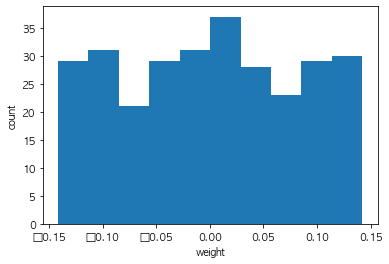

In [31]:
plt.hist( no_training_weights.reshape( -1, 1 ) )
plt.xlabel( 'weight' )
plt.ylabel( 'count' )
plt.show()

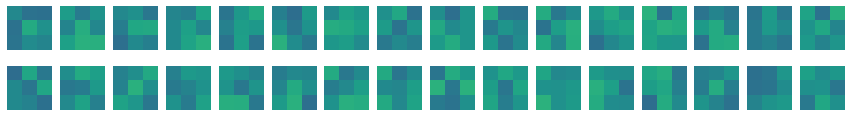

In [32]:
fig, axs = plt.subplots( 2, 16, figsize = ( 15, 2 ) )
for i in range( 2 ):
    for j in range( 16 ):
        axs[ i, j ].imshow( no_training_weights[ :, :, 0, i * 16 + j ],
                            vmin = -0.5, vmax = 0.5 )
        axs[ i, j ].axis( 'off' )
plt.show()

* 특성맵 시각화

In [33]:
# 함수형 API를 이용한 Neural Network
#
dense1 = keras.layers.Dense( 100, activation = 'sigmoid' )
dense2 = keras.layers.Dense( 10, activation = 'softmax' )

conv_acti = keras.models.Model( model.input, model.layers[ 0 ].output ) 

(60000, 28, 28)


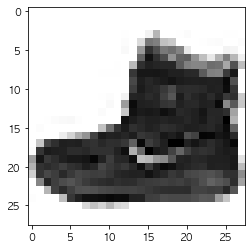

In [34]:
( train_input, train_target ), ( test_input, test_target ) =\
    keras.datasets.fashion_mnist.load_data()
print( train_input.shape )

plt.imshow( train_input[ 0 ], cmap = 'gray_r' )
plt.show()

In [35]:
inputs = train_input[ 0:1 ].reshape( -1, 28, 28, 1 ) / 255.0
feature_maps = conv_acti.predict( inputs )

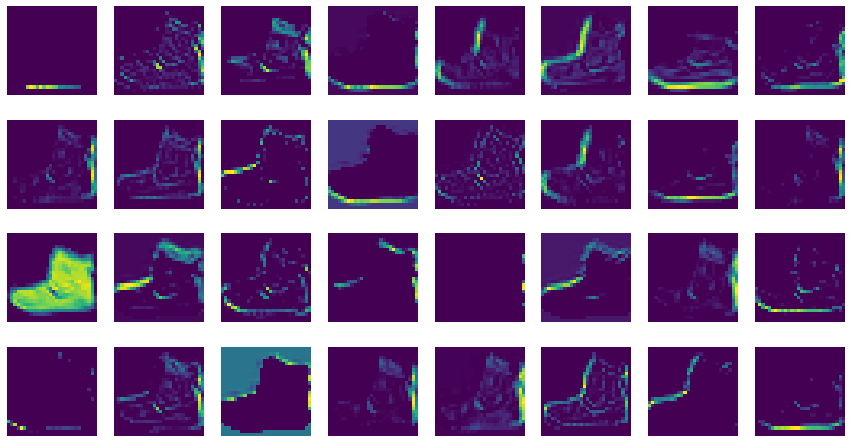

In [36]:
fig, axs = plt.subplots( 4, 8, figsize = ( 15, 8 ) )
for i in range( 4 ):
    for j in range( 8 ):
        axs[ i, j ].imshow( feature_maps[ 0, :, :, i * 8 + j ] )
        axs[ i, j ].axis( 'off' )
plt.show()

# RNN( Recurrent Neural Network, 순환 신경망 )

In [37]:
from tensorflow.keras.datasets import imdb # 영어 리뷰에 대한 긍정/부정

* 데이터 준비

In [38]:
( train_input, train_target ), ( test_input, test_target ) =\
    imdb.load_data( num_words = 500 ) # num_words = 500 : 자주 사용하는 단어 500개만 사용

In [39]:
print( train_input.shape, test_input.shape )

(25000,) (25000,)


In [40]:
print( len( train_input[ 0 ] ) )

218


In [41]:
print( train_input[ 0 ] )

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [42]:
print( len( train_input[ 1 ] ) )

189


* 데이터 분리

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# 학습 데이터를 학습 데이터와 검증 데이터로 분리
X_train, X_train_val, y_train, y_train_val = train_test_split(
    train_input, train_target, test_size = 0.2, random_state = 42
)

In [45]:
print( f'X_train shape : {X_train.shape}' )
print( f'X_train_val shape : {X_train_val.shape}' )
print( f'y_train shape : {y_train.shape}' )
print( f't_train_val shape : {y_train_val.shape}' )

X_train shape : (20000,)
X_train_val shape : (5000,)
y_train shape : (20000,)
t_train_val shape : (5000,)


* 데이터 탐색

In [46]:
lengths = np.array( [ len( x ) for x in X_train ] )

In [47]:
print( f'문장 평균 단어 개수 : {np.mean( lengths )}' )
print( f'단어 개수 중앙값 : {np.median( lengths )}' )

문장 평균 단어 개수 : 239.00925
단어 개수 중앙값 : 178.0


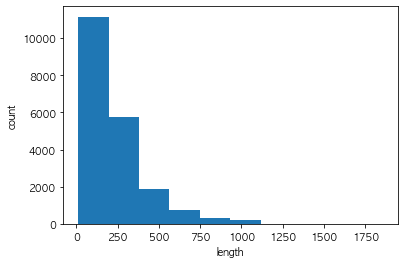

In [48]:
plt.hist( lengths )
plt.xlabel( 'length' )
plt.ylabel( 'count' )
plt.show()

* 문장의 길이를 맞추는 작업( padding 작업 )

In [49]:
from tensorflow.keras.preprocessing import sequence

In [50]:
# maxlen = 100 : 문장의 최대 길이
X_train_seq = sequence.pad_sequences( X_train, maxlen = 100 )

In [51]:
print( X_train_seq.shape )

(20000, 100)


In [52]:
print( X_train_seq[ 1000 ] )

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   1  73  13  69   8  30   2   5 202  14   6 241  14  16   2
   2   8   4   2   2   2  11  15   2   2 121  41   2  26  13 258  15   2
   2  85  74  15  14  20 127 164  53  74   2   6 171  52   2  19   6 464
 163  48 335   2   8   2   2   2   2   2  33  12  19 294  21  12   2  57
 128  74   6 241   5   6 241 184  76   2]


In [53]:
X_train_val_seq = sequence.pad_sequences( X_train_val, maxlen = 100 )
print( X_train_val_seq.shape )

(5000, 100)


* RNN 모델 생성 및 학습

In [54]:
model = keras.Sequential()

# Tensorflow - NumPy : 1.19.x 이 버전 이상 사용시 error
model.add( keras.layers.SimpleRNN( 8, input_shape = ( 100, 500 ) ) )
model.add( keras.layers.Dense( 1, activation = 'sigmoid' ) )

In [55]:
# One-hot encoding 
X_train_oh = keras.utils.to_categorical( X_train_seq )

In [56]:
print( X_train_oh.shape )

(20000, 100, 500)


In [57]:
X_train_val_oh = keras.utils.to_categorical( X_train_val_seq )

In [58]:
print( X_train_val_oh.shape )

(5000, 100, 500)


In [59]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [60]:
rmsprop = keras.optimizers.RMSprop( learning_rate = 1e-4 )
model.compile( optimizer = rmsprop, 
               loss = 'binary_crossentropy',
               metrics = [ 'accuracy' ] )

checkpoint_cb = keras.callbacks.ModelCheckpoint( 'best-simplernn-model.h5' )
early_stopping_cb = keras.callbacks.EarlyStopping( patience = 3,
                                                   restore_best_weights = True )
history = model.fit( X_train_oh, y_train, epochs = 100,
                     batch_size = 64, 
                     validation_data = ( X_train_val_oh, y_train_val ),
                     callbacks = [ checkpoint_cb, early_stopping_cb ] )

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 26s 1ms/sample - loss: 0.6922 - accuracy: 0.5236 - val_loss: 0.6815 - val_accuracy: 0.5604
Epoch 2/100
20000/20000 [==============================] - 24s 1ms/sample - loss: 0.6587 - accuracy: 0.6090 - val_loss: 0.6445 - val_accuracy: 0.6358
Epoch 3/100
20000/20000 [==============================] - 24s 1ms/sample - loss: 0.6253 - accuracy: 0.6599 - val_loss: 0.6140 - val_accuracy: 0.6796
Epoch 4/100
20000/20000 [==============================] - 24s 1ms/sample - loss: 0.5970 - accuracy: 0.6902 - val_loss: 0.5894 - val_accuracy: 0.7054
Epoch 5/100
20000/20000 [==============================] - 25s 1ms/sample - loss: 0.5723 - accuracy: 0.7165 - val_loss: 0.5696 - val_accuracy: 0.7164
Epoch 6/100
20000/20000 [==============================] - 24s 1ms/sample - loss: 0.5504 - accuracy: 0.7375 - val_loss: 0.5503 - val_accuracy: 0.7344
Epoch 7/100
20000/20000 [==========================

* RNN 모델 평가( 시각화 )

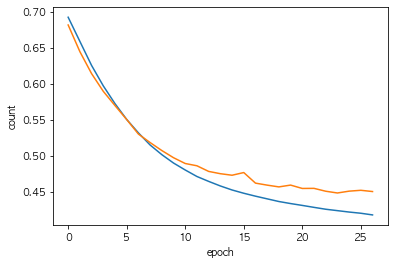

In [61]:
plt.plot( history.history[ 'loss' ] )
plt.plot( history.history[ 'val_loss' ] )
plt.xlabel( 'epoch' )
plt.ylabel( 'count' )
plt.show()